In [19]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, '../src')

import bin_exploration

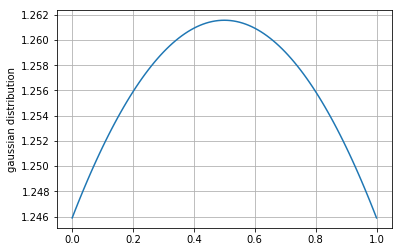

In [49]:
# gaussian distribution with m=.5 and s=.1
mean = .5
variance = .1
x = np.arange(0,1.01,.01)
f = np.exp(-np.square(x-mean)/2*variance)/(np.sqrt(2*np.pi*variance))

plt.plot(x,f)
plt.grid(True)
plt.ylabel('gaussian distribution')
plt.show()


In [2]:
# minimum theoretical values
def uniform_mean_error(k, d=1):
    return d/(4*k)

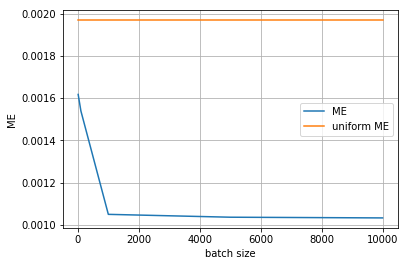

In [25]:
# check the average ME depending on the batch size
dims = 1
k = 127

th_value = uniform_mean_error(k)
batch_sizes = [10, 100, 1000, 5000, 10000]
average_ME = []

for batch_size in batch_sizes:
    tree = bin_exploration.Exploration_tree(dims, k)
    values = []

    batches = 100
    
    for _ in range(batches):
        batch = np.random.normal(.5, .1, size=batch_size).reshape(batch_size, 1)
    
        for sample in batch:
            tree.search_nearest_node(sample)

        values.append(tree.get_total_value()/len(batch))
        tree.update()
    average_ME.append(np.average(values))
    

plt.plot(batch_sizes, average_ME, label='ME')
plt.plot(batch_sizes, [th_value]*len(batch_sizes), label='uniform ME')
plt.xlabel('batch size')
plt.ylabel('ME')
plt.legend()
plt.grid(True)
plt.show()



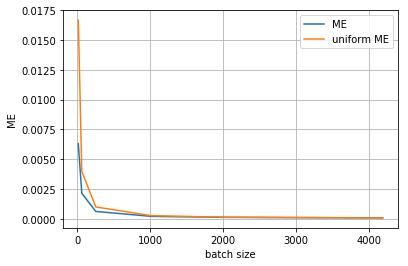

In [32]:
# check the average ME depending on the tree size
dims = 1
ks = [15, 63, 255, 1023, 2047, 4191]

th_values = list(uniform_mean_error(k) for k in ks)
batch_size = 1000
average_ME = []

for k in ks:
    tree = bin_exploration.Exploration_tree(dims, k)
    values = []

    batches = 100
    for _ in range(batches):
        batch = np.random.normal(.5, .1, size=batch_size).reshape(batch_size, 1)
    
        for sample in batch:
            tree.search_nearest_node(sample)

        values.append(tree.get_total_value()/len(batch))
        tree.update()
        
    average_ME.append(np.average(values))
    

plt.plot(ks, average_ME, label='ME')
plt.plot(ks, th_values, label='uniform ME')
plt.xlabel('batch size')
plt.ylabel('ME')
plt.legend()
plt.grid(True)
plt.show()



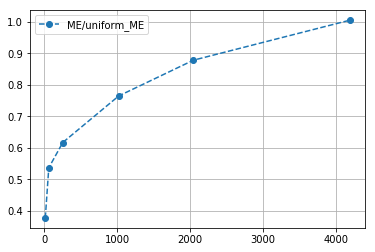

In [40]:
ratio = np.array(average_ME)/np.array(th_values)

plt.plot(ks, ratio, 'o--', label='ME/uniform_ME')
plt.legend()
plt.grid(True)
plt.show()
# plt.errorbar(x, y, xerr=0.1*x, yerr=5.0 + 0.75*y)

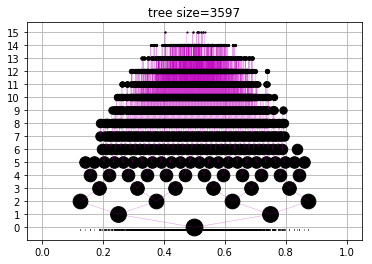

In [41]:
tree.plot()

In [51]:
# check the average ME depending on the tree size
dims = 1
k = 4191

th_value = uniform_mean_error(k)
batch_size = 1000
sizes = []


tree = bin_exploration.Exploration_tree(dims, k)
values = []
batches = 100
for _ in range(batches):
    batch = np.random.normal(.5, .1, size=batch_size).reshape(batch_size, 1)

    for sample in batch:
        tree.search_nearest_node(sample)

    values.append(tree.get_total_value()/len(batch))
    sizes.append(tree.get_current_size())
    tree.update()
    sizes.append(tree.get_current_size())
        
        



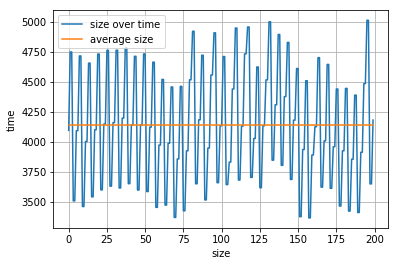

In [56]:
plt.plot(sizes, label='size over time')
plt.plot([0, len(sizes)-1], [np.average(sizes)]*2, label='average size')
plt.xlabel('size')
plt.ylabel('time')
plt.legend()
plt.grid(True)
plt.show()

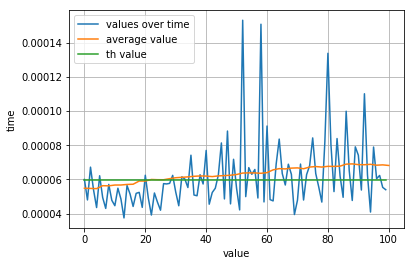

In [68]:
N = 50
plt.plot(values, label='values over time')
plt.plot(np.arange(0, 2*N+1, 2), np.convolve(values, np.ones((N,))/N, mode='valid'), label='average value')
plt.plot([0, len(values)-1], [uniform_mean_error(k)]*2, label='th value')
plt.xlabel('value')
plt.ylabel('time')
plt.legend()
plt.grid(True)
plt.show()